In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

import probDistInputNoise as model
import probTools as tools



# Checking stuff

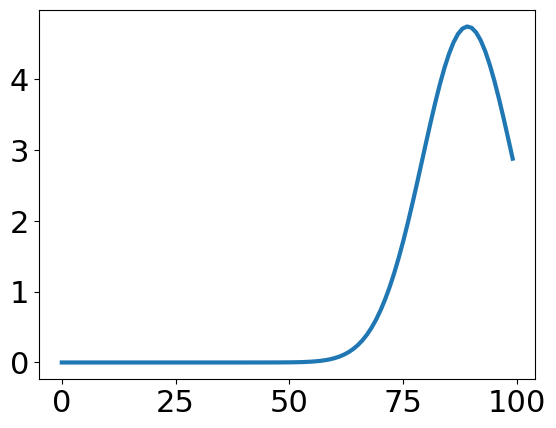

In [4]:
p_m_given_p_input = model.MI_efficient_encoding(0.9, 0.1)

plt.plot(p_m_given_p_input[0])

In [5]:
output_scale, output_prob_dist = model.output_prob_distribution(tools.input_scale_full, [0.4], 0.5)

output_prob_dist


(100,)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        3.24795591, 3.34784966, 3.43583186, 3.51174405, 3.57614323,
        3.62903533, 3.6707517 , 3.70168137, 3.72205634, 3.73201439,
        3.7320364 , 3.72240348, 3.70339637, 3.67529327, 3.63836864,
        3.59284295, 3.53898545, 3.47710777, 3.4074692 , 3.33033012,
        3.24595456, 3.15461321, 3.05646308, 2.95189964, 2.84125699,
        2.72480209, 2.60286435, 2.47593834, 2.34431432, 2.20859593,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [6]:
output_scale, output_prob_dist = model.output_prob_distribution(tools.input_scale_full,tools.input_scale_full, 0.1)

output_means = model.output_mean(tools.input_scale_full,tools.input_scale_full, 0.05)

(100,)
(100,)


In [7]:
np.shape(output_prob_dist)
np.shape(output_means)

(100,)

# Bias and variability predictions

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


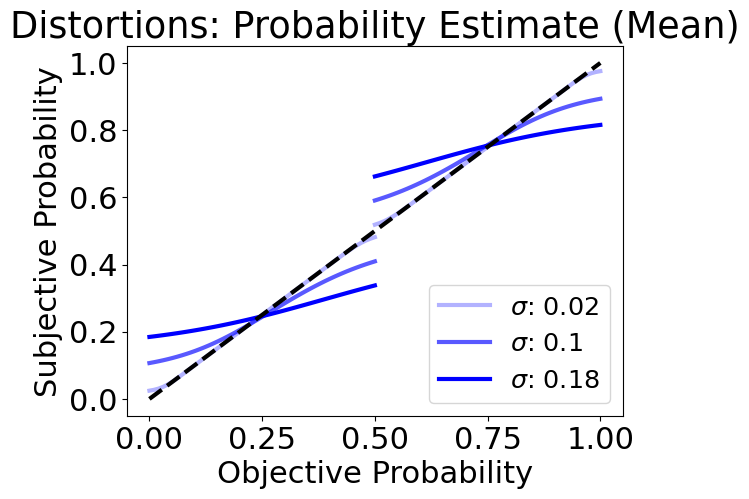

In [8]:
import matplotlib.pyplot as plt

sigma1 = 0.02
sigma2 = 0.1
sigma3 = 0.18


# Assuming 'tools' is a module or class that provides the required functions
output_scale, output_prob_dist1 = model.output_prob_distribution(tools.input_scale_half1,tools.input_scale_half1, sigma1)
output_scale, output_prob_dist2 = model.output_prob_distribution(tools.input_scale_half1,tools.input_scale_half1, sigma2)
output_scale, output_prob_dist3 = model.output_prob_distribution(tools.input_scale_half1,tools.input_scale_half1,sigma3)

output_means11 = model.output_mean(tools.input_scale_half1,tools.input_scale_half1, sigma1)
output_means21 =  model.output_mean(tools.input_scale_half1,tools.input_scale_half1, sigma2)
output_means31 =  model.output_mean(tools.input_scale_half1,tools.input_scale_half1, sigma3)
output_means12 = model.output_mean(tools.input_scale_half2,tools.input_scale_half2, sigma1)
output_means22 =  model.output_mean(tools.input_scale_half2,tools.input_scale_half2, sigma2)
output_means32 =  model.output_mean(tools.input_scale_half2,tools.input_scale_half2, sigma3)

output_variances11 = model.output_variance(tools.input_scale_half1,tools.input_scale_half1, sigma1)
output_variances21 = model.output_variance(tools.input_scale_half1,tools.input_scale_half1, sigma2)
output_variances31 = model.output_variance(tools.input_scale_half1, tools.input_scale_half1,sigma3)

plt.plot(tools.input_scale_half1,output_means11, alpha=0.3, c="b", label=f'$\sigma$: {sigma1}')
plt.plot(tools.input_scale_half1,output_means21, alpha=0.65, c="b", label=f'$\sigma$: {sigma2}')
plt.plot(tools.input_scale_half1,output_means31, alpha=1.0, c="b", label=f'$\sigma$: {sigma3}')
plt.plot(tools.input_scale_half2,output_means12, alpha=0.3, c="b")
plt.plot(tools.input_scale_half2,output_means22, alpha=0.65, c="b")
plt.plot(tools.input_scale_half2,output_means32, alpha=1.0, c="b")


plt.plot(tools.input_scale_full,tools.input_scale_full, "--", c="k")

plt.xlabel('Objective Probability')
plt.ylabel('Subjective Probability')
plt.title('Distortions: Probability Estimate (Mean)')

plt.legend(loc='lower right', fontsize='small')


# Show the plot (optional)
plt.show()


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


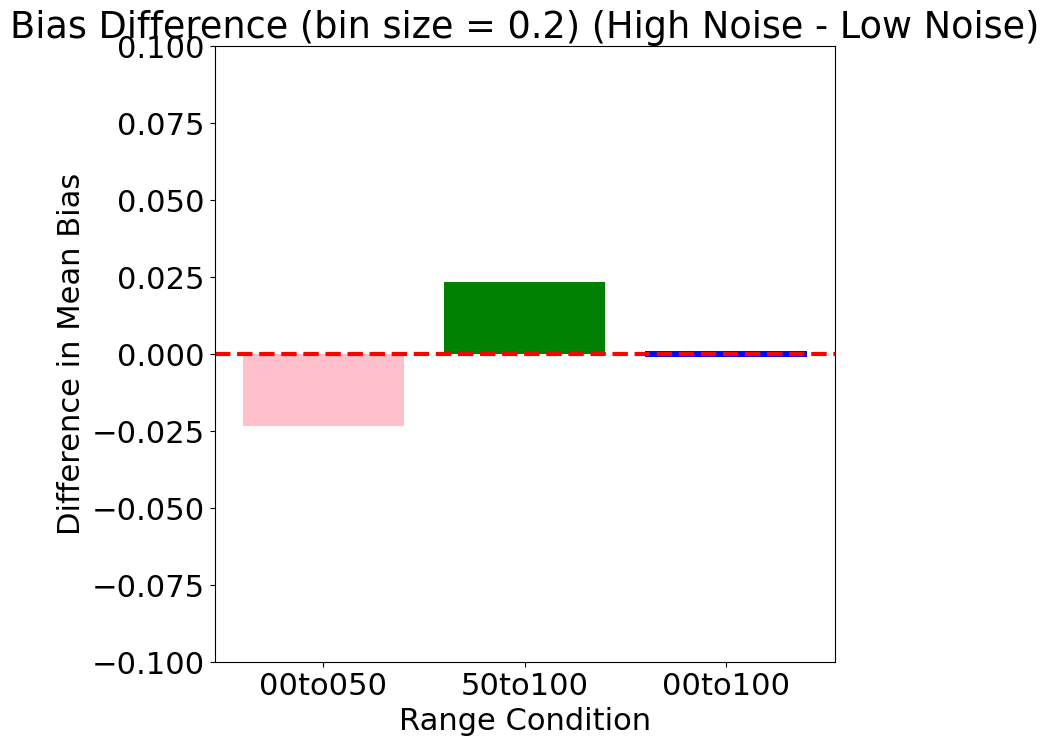

In [9]:
# Bias difference around 0.5 as function of noise
bin_size = 0.2
sigma_high = 0.08
sigma_low = 0.04

less5bin = tools.input_scale_half1[-int(bin_size*tools.grid_points):]
more5bin = tools.input_scale_half2[:int(bin_size*tools.grid_points)]
around5bin = tools.input_scale_full[int(tools.grid_points/2 - bin_size*tools.grid_points):int(tools.grid_points/2 + bin_size*tools.grid_points)]

# Calculate average biases for high noise conditions
less5biashigh = np.mean(model.output_mean(tools.input_scale_half1, tools.input_scale_half1, sigma_high)[-int(bin_size*tools.grid_points):] - less5bin)
more5biashigh = np.mean(model.output_mean(tools.input_scale_half2, tools.input_scale_half2, sigma_high)[:int(bin_size*tools.grid_points)] - more5bin)
around5biashigh = np.mean(model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma_high)[int(tools.grid_points/2 - bin_size*tools.grid_points):int(tools.grid_points/2 + bin_size*tools.grid_points)] - around5bin)

# Calculate average biases for low noise conditions
less5biaslow = np.mean(model.output_mean(tools.input_scale_half1, tools.input_scale_half1, sigma_low)[-int(bin_size*tools.grid_points):] - less5bin)
more5biaslow = np.mean(model.output_mean(tools.input_scale_half2, tools.input_scale_half2, sigma_low)[:int(bin_size*tools.grid_points)] - more5bin)
around5biaslow = np.mean(model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma_low)[int(tools.grid_points/2 - bin_size*tools.grid_points):int(tools.grid_points/2 + bin_size*tools.grid_points)] - around5bin)

# Calculate the differences in mean bias
less5_diff = less5biashigh - less5biaslow
more5_diff = more5biashigh - more5biaslow
around5_diff = around5biashigh - around5biaslow+0.001

import matplotlib.pyplot as plt

# Your existing code...

# Create bar plot
plt.figure(figsize=(8, 8))
colors = ['pink', 'green', 'blue']
conditions = ['00to050', '50to100', '00to100']

plt.bar(conditions, [less5_diff, more5_diff, around5_diff], color=colors)
around5_diff = around5biashigh - around5biaslow - 0.001
plt.bar(conditions, [less5_diff, more5_diff, around5_diff], color=colors)

plt.title('Bias Difference (bin size = 0.2) (High Noise - Low Noise)')
plt.xlabel('Range Condition')
plt.ylabel('Difference in Mean Bias')
plt.ylim(-0.1, 0.1)  # Set y-axis limits

# Add specific y-axis ticks
plt.yticks([-0.1, -0.075, -0.05, -0.025, 0, 0.025, 0.05, 0.075, 0.1])

plt.axhline(0, color='red', linestyle='--')
plt.show()


In [10]:
import numpy as np

bin_size = 0.1
num_bins_half1 = 5
num_bins_half2 = 5 
num_bins_full = 10


# Calculate output means for low noise conditions
less5output_low = model.output_mean(tools.input_scale_half1, tools.input_scale_half1, sigma_low)
more5output_low = model.output_mean(tools.input_scale_half2, tools.input_scale_half2, sigma_low)
around5output_low = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma_low)

# Calculate output means for high noise conditions
less5output_high = model.output_mean(tools.input_scale_half1, tools.input_scale_half1, sigma_high)
more5output_high = model.output_mean(tools.input_scale_half2, tools.input_scale_half2, sigma_high)
around5output_high = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma_high)

# Split grids into bins
bins_half1 = np.array_split(tools.input_scale_half1, num_bins_half1)
bins_half2 = np.array_split(tools.input_scale_half2, num_bins_half2)
bins_full = np.array_split(tools.input_scale_full, num_bins_full)

# Calculate mean for each bin
less5biaslow_mean = np.array([np.mean(less5output_low[(tools.input_scale_half1 >= bin_[0]) & (tools.input_scale_half1 <= bin_[-1])]-bin_) for bin_ in bins_half1])
more5biaslow_mean = np.array([np.mean(more5output_low[(tools.input_scale_half2 >= bin_[0]) & (tools.input_scale_half2 <= bin_[-1])]-bin_) for bin_ in bins_half2])
around5biaslow_mean = np.array([np.mean(around5output_low[(tools.input_scale_full >= bin_[0]) & (tools.input_scale_full <= bin_[-1])]-bin_) for bin_ in bins_full])

# Calculate mean for each bin
less5biashigh_mean = np.array([np.mean(less5output_high[(tools.input_scale_half1 >= bin_[0]) & (tools.input_scale_half1 <= bin_[-1])]-bin_) for bin_ in bins_half1])
more5biashigh_mean = np.array([np.mean(more5output_high[(tools.input_scale_half2 >= bin_[0]) & (tools.input_scale_half2 <= bin_[-1])]-bin_) for bin_ in bins_half2])
around5biashigh_mean = np.array([np.mean(around5output_high[(tools.input_scale_full >= bin_[0]) & (tools.input_scale_full <= bin_[-1])]-bin_) for bin_ in bins_full])


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


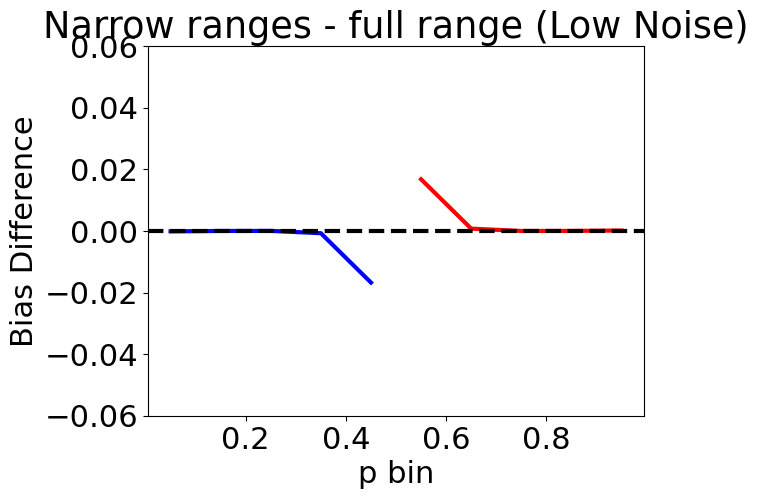

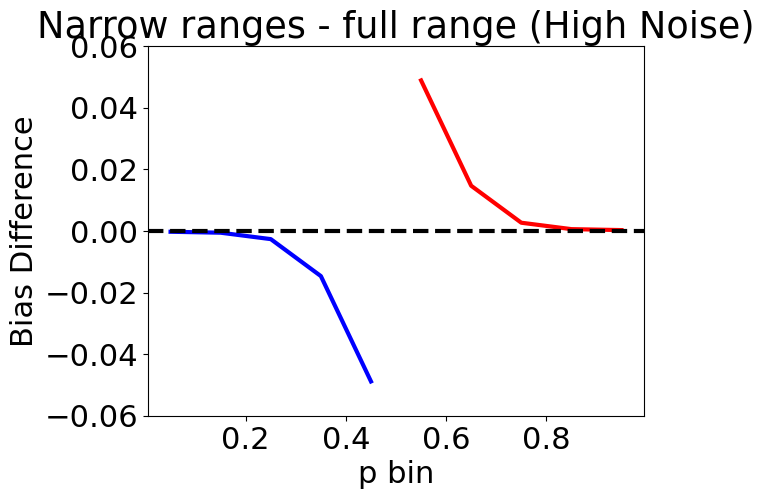

In [11]:
import matplotlib.pyplot as plt

# Your provided code for low noise conditions
plt.plot([0.05, 0.15, 0.25, 0.35, 0.45], less5biaslow_mean - around5biaslow_mean[:5], color="b")
plt.plot([0.55, 0.65, 0.75, 0.85, 0.95], more5biaslow_mean - around5biaslow_mean[5:], color="r")

# Add a horizontal dotted line at y=0
plt.axhline(0.0, linestyle='--', color='k')

# Set the title, x-axis label, and y-axis label
plt.title('Narrow ranges - full range (Low Noise)')
plt.xlabel('p bin')
plt.ylabel('Bias Difference')
plt.ylim((-0.06, 0.06))
# Show the plot
plt.show()

# Your provided code for high noise conditions
plt.plot([0.05, 0.15, 0.25, 0.35, 0.45], less5biashigh_mean - around5biashigh_mean[:5], color="b")
plt.plot([0.55, 0.65, 0.75, 0.85, 0.95], more5biashigh_mean - around5biashigh_mean[5:], color="r")

# Add a horizontal dotted line at y=0
plt.axhline(0.0, linestyle='--', color='k')

# Set the title, x-axis label, and y-axis label
plt.title('Narrow ranges - full range (High Noise)')
plt.xlabel('p bin')
plt.ylabel('Bias Difference')
plt.ylim((-0.06, 0.06))

# Show the plot
plt.show()


In [12]:
less5biaslow_mean

array([ 1.72907478e-02, -3.32981876e-04, -5.24724390e-05, -7.43903356e-04,
       -1.67665904e-02])

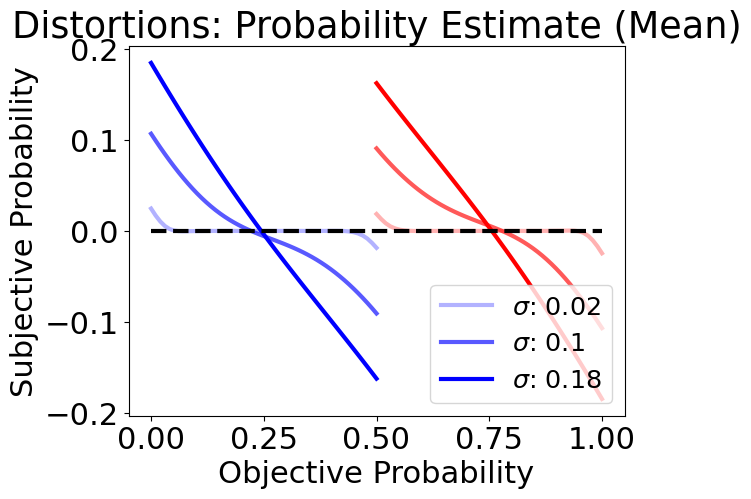

In [13]:


import matplotlib.pyplot as plt


plt.plot(tools.input_scale_half1,output_means11-tools.input_scale_half1, alpha=0.3, c="b", label=f'$\sigma$: {sigma1}')
plt.plot(tools.input_scale_half1,output_means21-tools.input_scale_half1, alpha=0.65, c="b", label=f'$\sigma$: {sigma2}')
plt.plot(tools.input_scale_half1,output_means31-tools.input_scale_half1, alpha=1.0, c="b", label=f'$\sigma$: {sigma3}')
plt.plot(tools.input_scale_half2,output_means12-tools.input_scale_half2, alpha=0.3, c="r")
plt.plot(tools.input_scale_half2,output_means22-tools.input_scale_half2, alpha=0.65, c="r")
plt.plot(tools.input_scale_half2,output_means32-tools.input_scale_half2, alpha=1.0, c="r")



plt.plot(tools.input_scale_full,tools.input_scale_full-tools.input_scale_full, "--", c="k")

plt.xlabel('Objective Probability')
plt.ylabel('Subjective Probability')
plt.title('Distortions: Probability Estimate (Mean)')

plt.legend(loc='lower right', fontsize='small')


# Show the plot (optional)
plt.show()


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


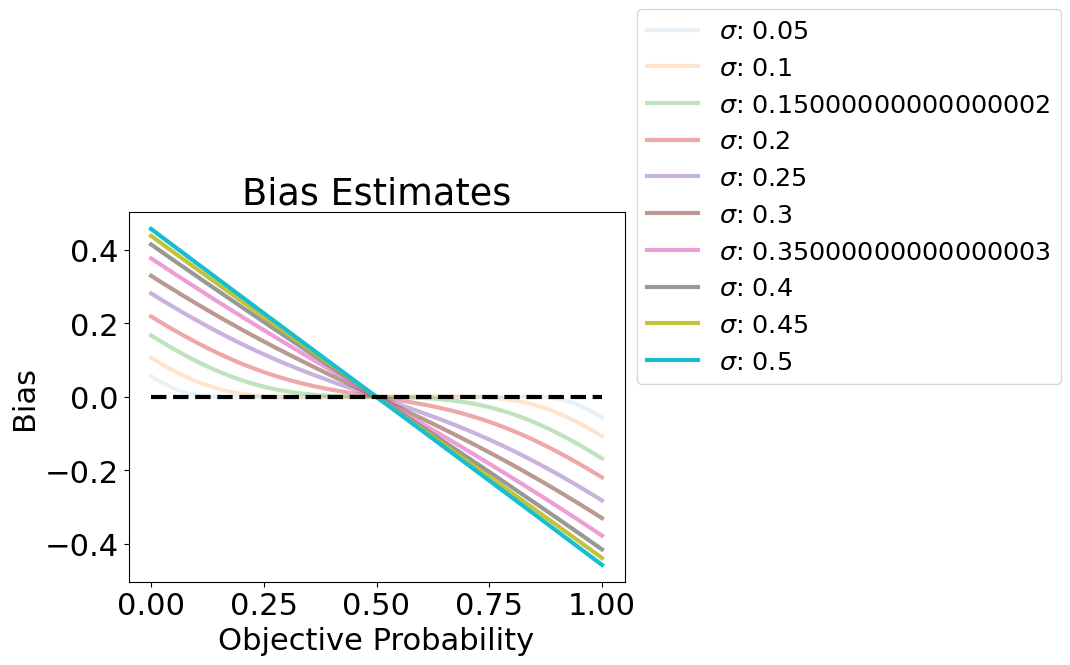

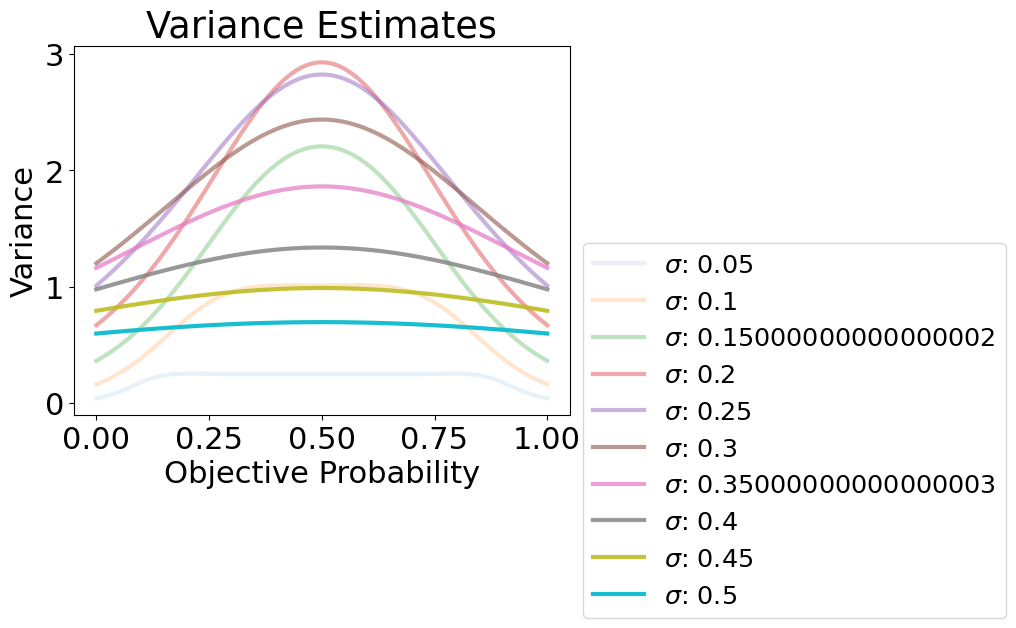

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Existing sigma values
sigma1 = 0.1
sigma2 = 0.18
sigma3 = 0.25

# New sigma values
sigma_values = np.arange(0.05, 0.55, 0.05)

# Lists to store means and variances
all_means = []
all_variances = []

# Loop over sigma values
for sigma in sigma_values:
    # Calculate means and variances
    output_means = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
    output_variances = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)
    
    # Append means and variances to the lists
    all_means.append(output_means - tools.input_scale_full)
    all_variances.append(output_variances)

# Plotting means
for means, sigma in zip(all_means, sigma_values):
    plt.plot(tools.input_scale_full, means, alpha=sigma/0.5, label=f'$\sigma$: {sigma}')

# Plotting reference line
plt.plot(tools.input_scale_full, tools.input_scale_full - tools.input_scale_full, "--", c="k")

plt.xlabel('Objective Probability')
plt.ylabel('Bias')
plt.title('Bias Estimates')

# Move legend outside
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.show()

# Plotting variances
for variances, sigma in zip(all_variances, sigma_values):
    plt.plot(tools.input_scale_full, variances, alpha=sigma/0.5, label=f'$\sigma$: {sigma}')

plt.xlabel('Objective Probability')
plt.ylabel('Variance')
plt.title('Variance Estimates')

# Move legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.show()


# Bias variance relations

In [15]:
import numpy as np

# Existing sigma values
sigma_values = np.arange(0.05, 0.55, 0.05)

# Lists to store biases and variances for each bin
binBiases = []
binVariances = []

for i in range(0, 5):
    # Initialize lists for each iteration
    biases_i = []
    variances_i = []

    # Loop over sigma values
    for sigma in sigma_values:
        # Calculate means and variances
        output_means = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
        output_variances = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)

        # Calculate bin biases and variances
        bin_biases_i = (output_means - tools.input_scale_full)[20 * i:20 * i + 20].mean()
        bin_variances_i = output_variances[20 * i:20 * i + 20].mean()

        # Append values to lists
        biases_i.append(bin_biases_i)
        variances_i.append(bin_variances_i)

    # Append lists to the main lists
    binBiases.append(biases_i)
    binVariances.append(variances_i)

# Print or use the resulting lists as needed
print("Bin Biases:", binBiases)
print("Bin Variances:", binVariances)


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

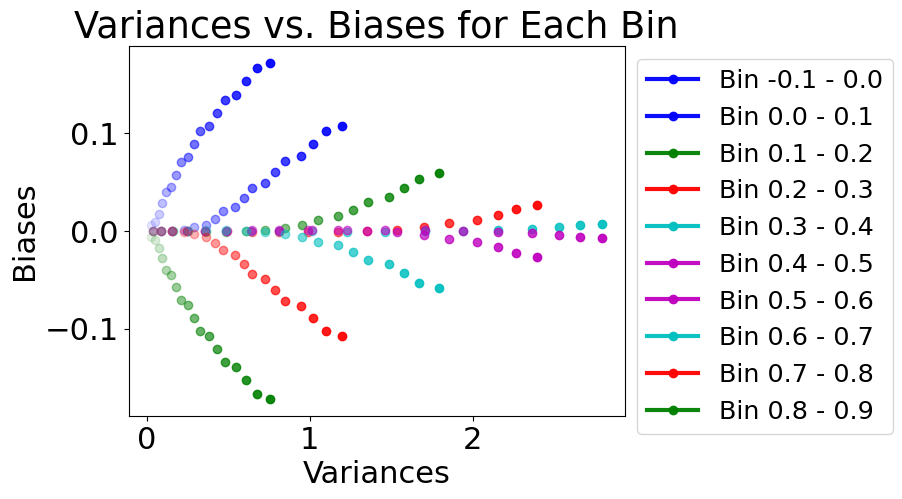

Correlation Values for Each Bin: [0.9859118214154705, 0.9769028540563929, 0.8957448129149974, 0.8035357369391396, 0.7171939988258464, -0.7171939988258453, -0.8035357369391395, -0.8957448129149966, -0.976902854056393, -0.9859118214154706]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Existing sigma values
sigma_values = np.arange(0.02, 0.2, 0.01)

# Lists to store biases and variances for each bin
binBiases = []
binVariances = []
correlations = []  # List to store correlations

# Define color for each bin
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']

for i in range(0, 10):
    # Initialize lists for each iteration
    biases_i = []
    variances_i = []

    # Loop over sigma values
    for sigma in sigma_values:
        # Calculate means and variances
        output_means = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
        output_variances = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)

        # Calculate bin biases and variances
        bin_biases_i = (output_means - tools.input_scale_full)[10 * i:10 * i + 10].mean()
        bin_variances_i = output_variances[10 * i:10 * i + 10].mean()

        # Append values to lists
        biases_i.append(bin_biases_i)
        variances_i.append(bin_variances_i)

    # Append lists to the main lists
    binBiases.append(biases_i)
    binVariances.append(variances_i)

    # Calculate correlation for the current bin
    correlation = np.corrcoef(biases_i, variances_i)[0, 1]
    correlations.append(correlation)

    # Plotting line plots for each bin with transparency based on sigma values
    bin_label = f'Bin {(i-1)/10} - {i/10}'  # Adjust the bin labels
    for sigma, (bias, variance) in zip(sigma_values, zip(biases_i, variances_i)):
        alpha_value = sigma / 0.2  # Set transparency inversely proportional to sigma
        if sigma == sigma_values[-1]:
            plt.plot(variance, bias, marker='o', label=bin_label, color=bin_colors[i-1], alpha=alpha_value)
        else:
            plt.plot(variance, bias, marker='o', color=bin_colors[i-1], alpha=alpha_value)

# Add labels and legend outside
plt.xlabel('Variances')
plt.ylabel('Biases')
plt.title('Variances vs. Biases for Each Bin')

# Move legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.show()

# Print or use the correlation values as needed
print("Correlation Values for Each Bin:", correlations)


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

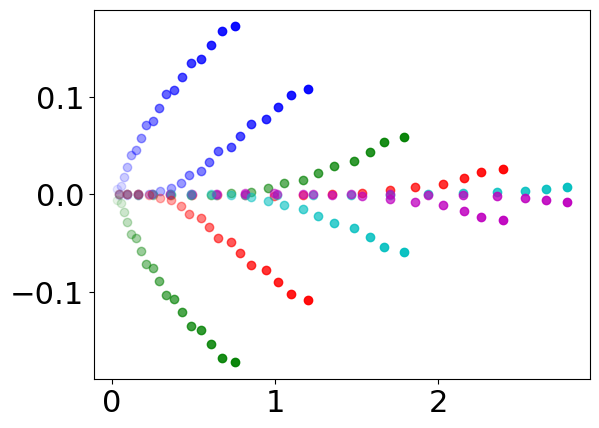

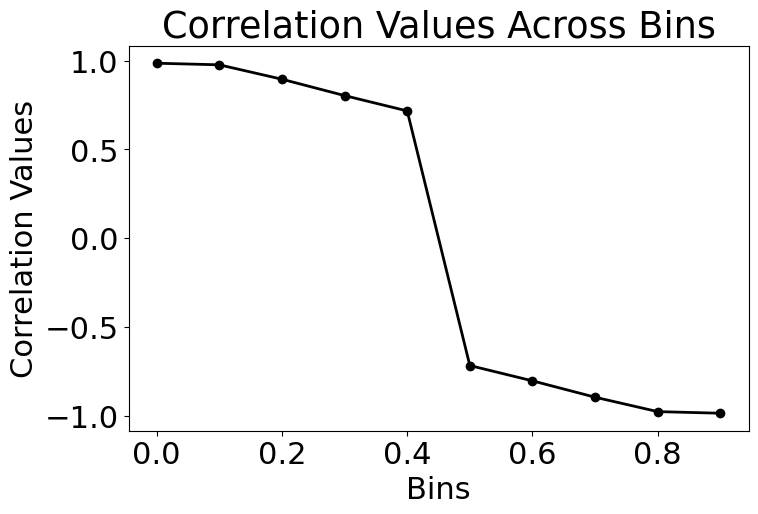

Correlation Values Across Bins: [0.9859118214154705, 0.9769028540563929, 0.8957448129149972, 0.8035357369391397, 0.7171939988258464, -0.7171939988258453, -0.8035357369391395, -0.8957448129149966, -0.9769028540563931, -0.9859118214154705]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Existing sigma values
sigma_values = np.arange(0.02, 0.2, 0.01)

# Lists to store biases and variances for each bin
binBiases = []
binVariances = []
correlations = []  # List to store correlations

# Define color for each bin
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']

for i in range(0, 10):
    # Initialize lists for each iteration
    biases_i = []
    variances_i = []

    # Loop over sigma values
    for sigma in sigma_values:
        # Calculate means and variances
        output_means = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
        output_variances = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)

        # Calculate bin biases and variances
        bin_biases_i = (output_means - tools.input_scale_full)[10 * i:10 * i + 10].mean()
        bin_variances_i = output_variances[10 * i:10 * i + 10].mean()

        # Append values to lists
        biases_i.append(bin_biases_i)
        variances_i.append(bin_variances_i)

    # Append lists to the main lists
    binBiases.append(biases_i)
    binVariances.append(variances_i)

    # Calculate correlation for the current bin
    correlation = np.corrcoef(variances_i, biases_i)[0, 1]
    correlations.append(correlation)

    # Plotting line plots for each bin with transparency based on sigma values
    bin_label = f'Bin {(i-1)/10} - {i/10}'  # Adjust the bin labels
    for sigma, (bias, variance) in zip(sigma_values, zip(biases_i, variances_i)):
        alpha_value = sigma / 0.2  # Set transparency inversely proportional to sigma
        if sigma == sigma_values[-1]:
            plt.plot(variance, bias, marker='o', label=bin_label, color=bin_colors[i-1], alpha=alpha_value)
        else:
            plt.plot(variance, bias, marker='o', color=bin_colors[i-1], alpha=alpha_value)

# Create a separate plot for correlation values
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, 1, 0.1), correlations, marker='o', color='black', linestyle='-', linewidth=2)
plt.xlabel('Bins')
plt.ylabel('Correlation Values')
plt.title('Correlation Values Across Bins')
plt.show()

# Print or use the correlation values as needed
print("Correlation Values Across Bins:", correlations)


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

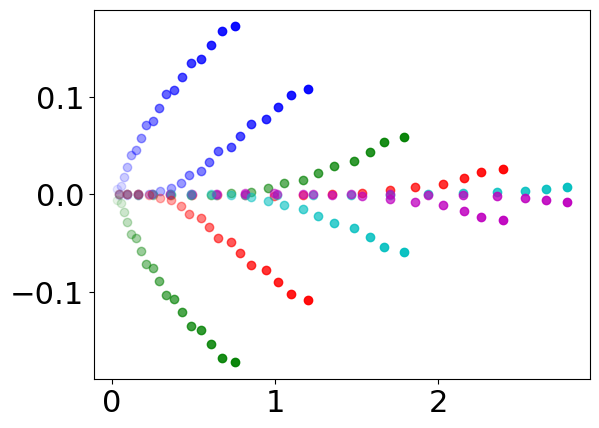

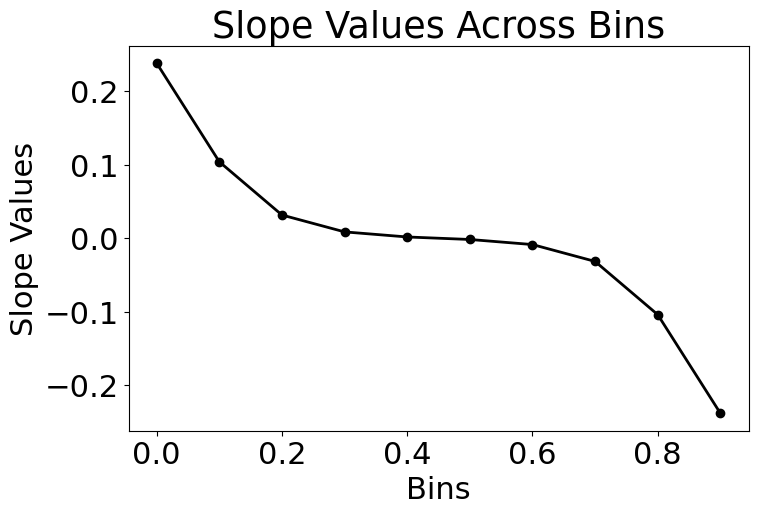

Slope Values Across Bins: [0.23819232288255016, 0.10402429625306824, 0.03158218479063768, 0.00861377537127278, 0.0017103082972352514, -0.001710308297235248, -0.00861377537127286, -0.03158218479063774, -0.10402429625306849, -0.23819232288255052]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Existing sigma values
sigma_values = np.arange(0.02, 0.2, 0.01)

# Lists to store biases and variances for each bin
binBiases = []
binVariances = []
slopes = []  # List to store slopes

# Define color for each bin
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']

for i in range(0, 10):
    # Initialize lists for each iteration
    biases_i = []
    variances_i = []

    # Loop over sigma values
    for sigma in sigma_values:
        # Calculate means and variances
        output_means = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
        output_variances = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)

        # Calculate bin biases and variances
        bin_biases_i = (output_means - tools.input_scale_full)[10 * i:10 * i + 10].mean()
        bin_variances_i = output_variances[10 * i:10 * i + 10].mean()

        # Append values to lists
        biases_i.append(bin_biases_i)
        variances_i.append(bin_variances_i)

    # Append lists to the main lists
    binBiases.append(biases_i)
    binVariances.append(variances_i)

    # Calculate slope for the current bin
    slope, intercept, r_value, p_value, std_err = linregress(variances_i, biases_i)
    slopes.append(slope)

    # Plotting line plots for each bin with transparency based on sigma values
    bin_label = f'Bin {(i-1)/10} - {i/10}'  # Adjust the bin labels
    for sigma, (bias, variance) in zip(sigma_values, zip(biases_i, variances_i)):
        alpha_value = sigma / 0.2  # Set transparency inversely proportional to sigma
        if sigma == sigma_values[-1]:
            plt.plot(variance, bias, marker='o', label=bin_label, color=bin_colors[i-1], alpha=alpha_value)
        else:
            plt.plot(variance, bias, marker='o', color=bin_colors[i-1], alpha=alpha_value)

# Create a separate plot for slope values
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, 1, 0.1), slopes, marker='o', color='black', linestyle='-', linewidth=2)
plt.xlabel('Bins')
plt.ylabel('Slope Values')
plt.title('Slope Values Across Bins')
plt.show()

# Print or use the slope values as needed
print("Slope Values Across Bins:", slopes)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Existing sigma values
sigma_values = np.arange(0.02, 0.09, 0.005)

# Lists to store biases and variances for each bin
binBiases_full = []
binVariances_full = []
slopes_full = []  # List to store slopes

# Lists to store biases and variances for each bin
binBiases_half1 = []
binVariances_half1 = []
slopes_half1 = []  # List to store slopes

# Lists to store biases and variances for each bin
binBiases_half2 = []
binVariances_half2 = []
slopes_half2 = []  # List to store slopes

# Define color for each bin
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']

for i in range(0, 10):
    # Initialize lists for each iteration
    biases_full_i = []
    variances_full_i = []
    biases_half1_i = []
    variances_half1_i = []
    biases_half2_i = []
    variances_half2_i = []

    # Loop over sigma values
    for sigma in sigma_values:
        # Calculate means and variances
        output_means_full = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
        output_variances_full = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)

        # Calculate bin biases and variances
        bin_biases_full_i = (output_means_full - tools.input_scale_full)[10 * i:10 * i + 10].mean()
        bin_variances_full_i = output_variances_full[10 * i:10 * i + 10].mean()

        # Append values to lists
        biases_full_i.append(bin_biases_full_i)
        variances_full_i.append(bin_variances_full_i)

        # Calculate means and variances
        output_means_half1 = model.output_mean(tools.input_scale_half1, tools.input_scale_half1, sigma)
        output_variances_half1 = model.output_variance(tools.input_scale_half1, tools.input_scale_half1, sigma)
        # Calculate bin biases and variances
        bin_biases_half1_i = (output_means_half1 - tools.input_scale_half1)[10 * i:10 * i + 10].mean()
        bin_variances_half1_i = output_variances_half1[10 * i:10 * i + 10].mean()
        # Append values to lists
        biases_half1_i.append(bin_biases_half1_i)
        variances_half1_i.append(bin_variances_half1_i)

        # Calculate means and variances
        output_means_half2 = model.output_mean(tools.input_scale_half2, tools.input_scale_half2, sigma)
        output_variances_half2 = model.output_variance(tools.input_scale_half2, tools.input_scale_half2, sigma)
        # Calculate bin biases and variances
        bin_biases_half2_i = (output_means_half1 - tools.input_scale_half2)[10 * i:10 * i + 10].mean()
        bin_variances_half2_i = output_variances_half2[10 * i:10 * i + 10].mean()
        # Append values to lists
        biases_half2_i.append(bin_biases_half2_i)
        variances_half2_i.append(bin_variances_half2_i)

    # Append lists to the main lists
    binBiases_full.append(biases_full_i)
    binVariances_full.append(variances_full_i)
    binBiases_half1.append(biases_half1_i)
    binVariances_half1.append(variances_half1_i)
    binBiases_half2.append(biases_half2_i)
    binVariances_half2.append(variances_half2_i)

    # Calculate slope for the current bin
    slope_full, intercept, r_value, p_value, std_err = linregress(variances_full_i, biases_full_i)
    slopes_full.append(slope_full)
        # Calculate slope for the current bin
    slope_half1, intercept, r_value, p_value, std_err = linregress(variances_half1_i, biases_half1_i)
    slopes_half1.append(slope_half1)
        # Calculate slope for the current bin
    slope_half2, intercept, r_value, p_value, std_err = linregress(variances_half2_i, biases_half2_i)
    slopes_half2.append(slope_half2)



(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_39694/475524135.py:53: RuntimeWarning: Mean of empty slice.
  bin_biases_half1_i = (output_means_half1 - tools.input_scale_half1)[10 * i:10 * i + 10].mean()
/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_39694/475524135.py:54: RuntimeWarning: Mean of empty slice.
  bin_variances_half1_i = output_variances_half1[10 * i:10 * i + 10].mean()
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_39694/475524135.py:63: RuntimeWarning: Mean of empty slice.
  bin_biases_half2_i = (output_means_half1 - tools.input_scale_half2)[10 * i:10 * i + 10].mean()
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_39694/475524135.py:64: RuntimeWarning: Mean of empty slice.
  bin_variances_half2_i = output_variances_half2[10 * i:10 * i + 10

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

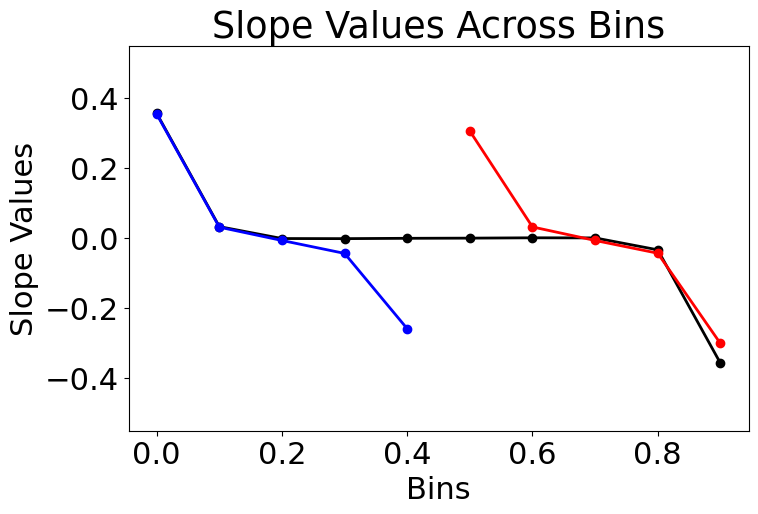

Slope Values Across Bins: [0.3565833450560398, 0.03315401734459361, -0.0009035137868706606, -0.0011943410396320663, -0.00023867714609340806, 0.00023867714609321193, 0.0011943410396319687, 0.0009035137868706918, -0.033154017344593036, -0.3565833450560405]


In [20]:
# Create a separate plot for slope values
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, 1, 0.1), slopes_full, marker='o', color='black', linestyle='-', linewidth=2)
plt.plot(np.arange(0, 0.5, 0.1), slopes_half1[0:5], marker='o', color='b', linestyle='-', linewidth=2)
plt.plot(np.arange(0.5, 1, 0.1), slopes_half2[0:5], marker='o', color='r', linestyle='-', linewidth=2)

plt.xlabel('Bins')
plt.ylabel('Slope Values')
plt.ylim(-0.55, 0.55)
plt.title('Slope Values Across Bins')
plt.show()

# Print or use the slope values as needed
print("Slope Values Across Bins:", slopes_full)

In [21]:
slopes_half1

[0.35456323755499153,
 0.031583019080732716,
 -0.006418612744264205,
 -0.04336068780402968,
 -0.25856425300282854,
 nan,
 nan,
 nan,
 nan,
 nan]

# Bayesian model 

In [22]:
import numpy as np

def compute_posterior(prior_mean, prior_std, likelihood_mean, likelihood_std):
    prior_precision = 1 / prior_std**2
    likelihood_precision = 1 / likelihood_std**2

    posterior_precision = prior_precision + likelihood_precision
    posterior_mean = (prior_mean * prior_precision + likelihood_mean * likelihood_precision) / posterior_precision
    posterior_variance = 1 / posterior_precision

    return posterior_mean, posterior_variance

# Define prior parameters
prior_mean = 0.5
prior_std = 0.1

# Define different likelihood means
likelihood_means = [0.1, 0.3, 0.5, 0.7, 0.9]

# Define common likelihood standard deviation
likelihood_stds = [0.05, 0.1, 0.15, 0.2]



# Compute posterior mean and variance for different likelihood means
for likelihood_mean in likelihood_means:
    for likelihood_std in likelihood_stds:
        posterior_mean, posterior_variance = compute_posterior(prior_mean, prior_std, likelihood_mean, likelihood_std)
        
        print(f"Likelihood Mean: {likelihood_mean}, Likelihood std: {likelihood_std} Bias: {posterior_mean - likelihood_mean:.4f}, Posterior Variance: {posterior_variance:.4f}")


Likelihood Mean: 0.1, Likelihood std: 0.05 Bias: 0.0800, Posterior Variance: 0.0020
Likelihood Mean: 0.1, Likelihood std: 0.1 Bias: 0.2000, Posterior Variance: 0.0050
Likelihood Mean: 0.1, Likelihood std: 0.15 Bias: 0.2769, Posterior Variance: 0.0069
Likelihood Mean: 0.1, Likelihood std: 0.2 Bias: 0.3200, Posterior Variance: 0.0080
Likelihood Mean: 0.3, Likelihood std: 0.05 Bias: 0.0400, Posterior Variance: 0.0020
Likelihood Mean: 0.3, Likelihood std: 0.1 Bias: 0.1000, Posterior Variance: 0.0050
Likelihood Mean: 0.3, Likelihood std: 0.15 Bias: 0.1385, Posterior Variance: 0.0069
Likelihood Mean: 0.3, Likelihood std: 0.2 Bias: 0.1600, Posterior Variance: 0.0080
Likelihood Mean: 0.5, Likelihood std: 0.05 Bias: 0.0000, Posterior Variance: 0.0020
Likelihood Mean: 0.5, Likelihood std: 0.1 Bias: 0.0000, Posterior Variance: 0.0050
Likelihood Mean: 0.5, Likelihood std: 0.15 Bias: 0.0000, Posterior Variance: 0.0069
Likelihood Mean: 0.5, Likelihood std: 0.2 Bias: 0.0000, Posterior Variance: 0.008

/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


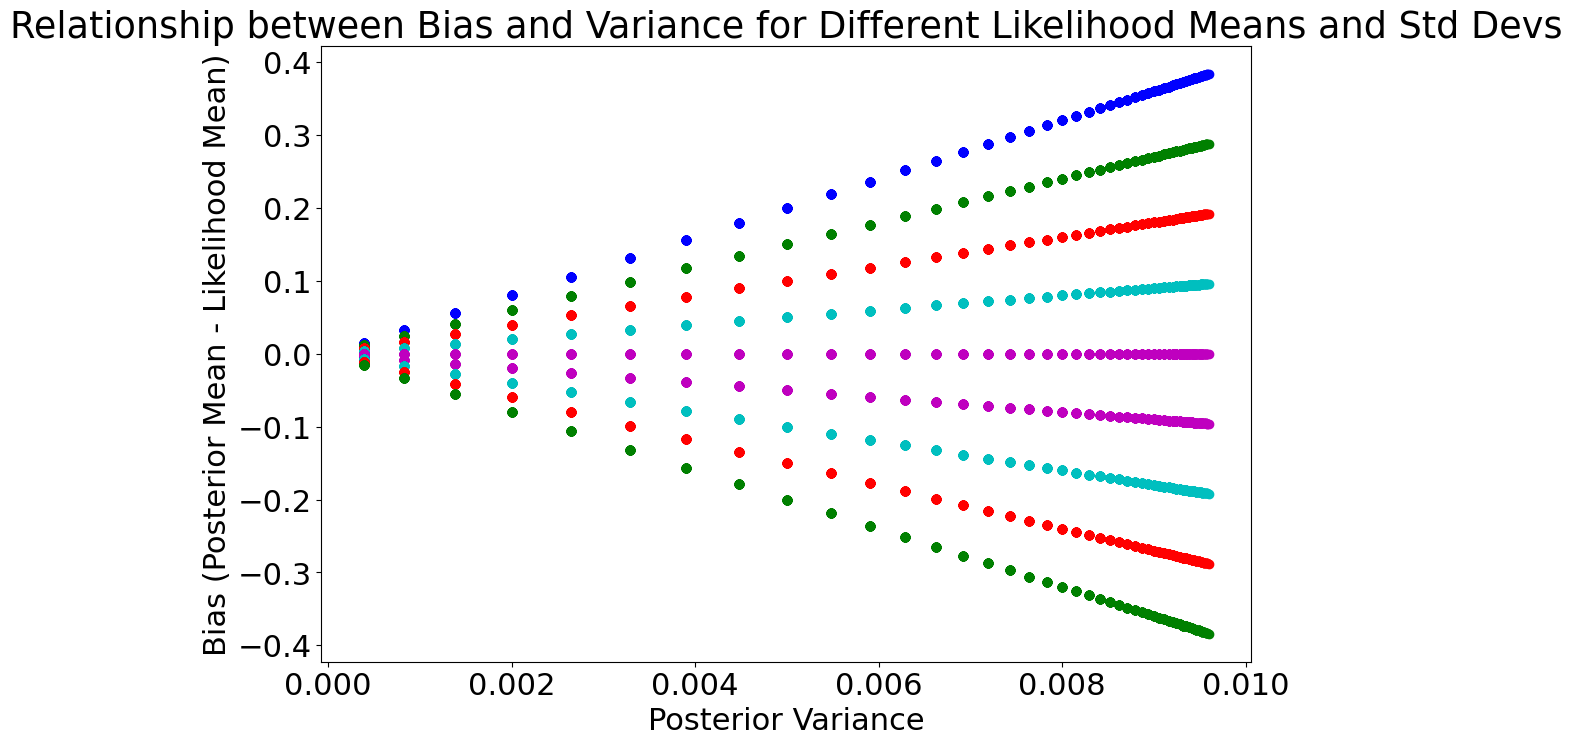

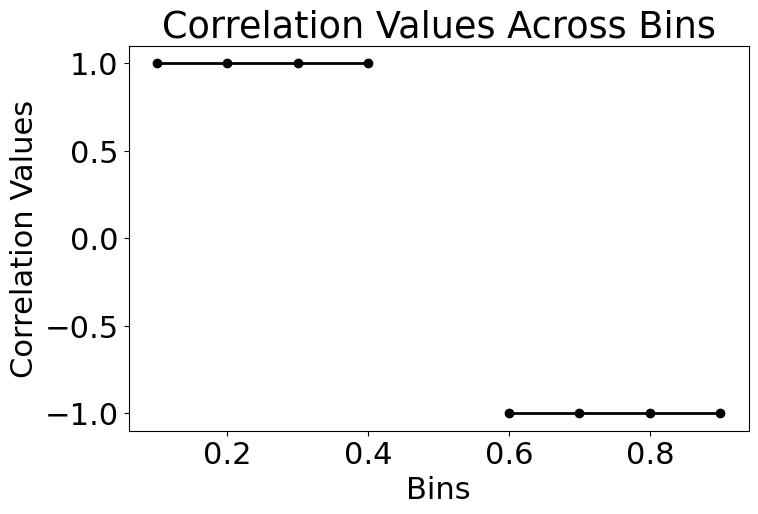

Correlation Values Across Bins: [1.0, 0.9999999999999998, 1.0, 1.0, nan, -0.9999999999999999, -0.9999999999999999, -1.0, -1.0]


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def compute_posterior(prior_mean, prior_std, likelihood_mean, likelihood_std):
    prior_precision = 1 / prior_std**2
    likelihood_precision = 1 / likelihood_std**2

    posterior_precision = prior_precision + likelihood_precision
    posterior_mean = (prior_mean * prior_precision + likelihood_mean * likelihood_precision) / posterior_precision
    posterior_variance = 1 / posterior_precision

    return posterior_mean, posterior_variance

# Define prior parameters
prior_mean = 0.5
prior_std = 0.1

# Define different likelihood means
likelihood_means = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']
# Define common likelihood standard deviations
likelihood_stds = np.arange(0.02, 0.5, 0.01)
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']
# Plotting
plt.figure(figsize=(12, 8))
i=-1
correlations = []
for likelihood_mean in likelihood_means:
    i = i+1
    bias = []
    posterior_variances = []
    for likelihood_std in likelihood_stds:

        posterior_mean, posterior_variance = compute_posterior(prior_mean, prior_std, likelihood_mean, likelihood_std)
        bias.append(posterior_mean - likelihood_mean)  # Bias
        posterior_variances.append(posterior_variance)

        plt.scatter(posterior_variances, bias, label=f'Mean={likelihood_mean}', color = bin_colors[i])

    # Calculate correlation for the current bin
    correlation = np.corrcoef(posterior_variances, bias)[0, 1]
    correlations.append(correlation)

plt.xlabel('Posterior Variance')
plt.ylabel('Bias (Posterior Mean - Likelihood Mean)')
plt.title('Relationship between Bias and Variance for Different Likelihood Means and Std Devs')
# plt.legend(title='Likelihood Mean', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Create a separate plot for correlation values
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0.1, 1.0, 0.1), correlations, marker='o', color='black', linestyle='-', linewidth=2)
plt.xlabel('Bins')
plt.ylabel('Correlation Values')
plt.title('Correlation Values Across Bins')
plt.show()

# Print or use the correlation values as needed
print("Correlation Values Across Bins:", correlations)


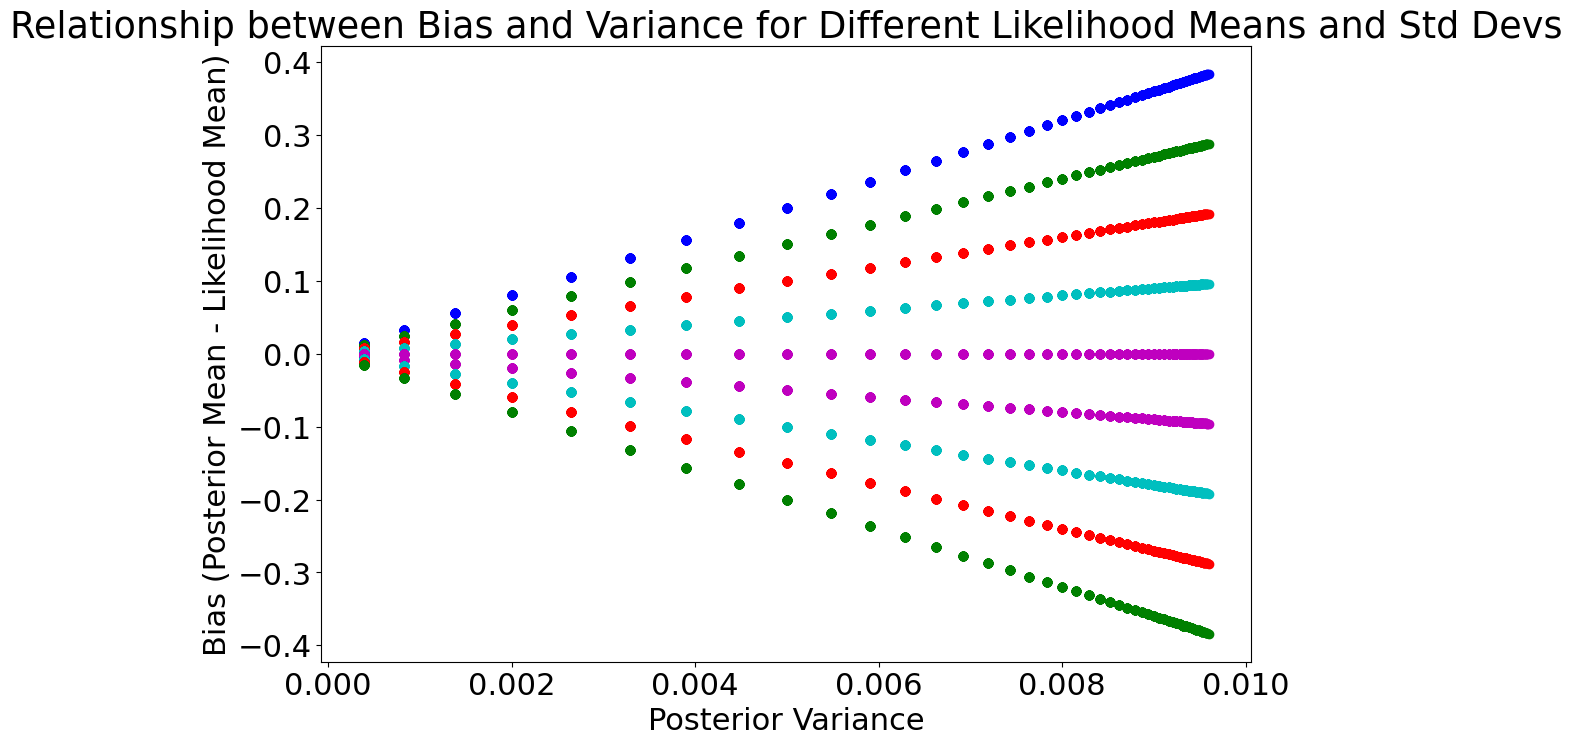

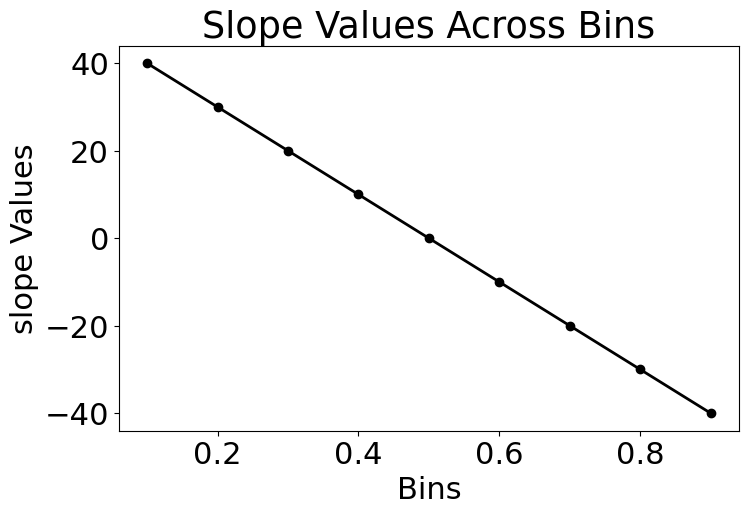

Slope Values Across Bins: [39.999999999999986, 29.999999999999986, 19.999999999999993, 9.999999999999996, 0.0, -9.999999999999993, -19.999999999999986, -29.99999999999999, -39.999999999999986]


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def compute_posterior(prior_mean, prior_std, likelihood_mean, likelihood_std):
    prior_precision = 1 / prior_std**2
    likelihood_precision = 1 / likelihood_std**2

    posterior_precision = prior_precision + likelihood_precision
    posterior_mean = (prior_mean * prior_precision + likelihood_mean * likelihood_precision) / posterior_precision
    posterior_variance = 1 / posterior_precision

    return posterior_mean, posterior_variance

# Define prior parameters
prior_mean = 0.5
prior_std = 0.1

# Define different likelihood means
likelihood_means = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']
# Define common likelihood standard deviations
likelihood_stds = np.arange(0.02, 0.5, 0.01)
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']
# Plotting
plt.figure(figsize=(12, 8))
i=-1
slopes = []
for likelihood_mean in likelihood_means:
    i = i+1
    bias = []
    posterior_variances = []
    for likelihood_std in likelihood_stds:

        posterior_mean, posterior_variance = compute_posterior(prior_mean, prior_std, likelihood_mean, likelihood_std)
        bias.append(posterior_mean - likelihood_mean)  # Bias
        posterior_variances.append(posterior_variance)

        plt.scatter(posterior_variances, bias, label=f'Mean={likelihood_mean}', color = bin_colors[i])

    # Calculate slope for the current bin
    slope, intercept, r_value, p_value, std_err = linregress(posterior_variances, bias)
    slopes.append(slope)

plt.xlabel('Posterior Variance')
plt.ylabel('Bias (Posterior Mean - Likelihood Mean)')
plt.title('Relationship between Bias and Variance for Different Likelihood Means and Std Devs')
# plt.legend(title='Likelihood Mean', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Create a separate plot for correlation values
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0.1, 1.0, 0.1), slopes, marker='o', color='black', linestyle='-', linewidth=2)
plt.xlabel('Bins')
plt.ylabel('slope Values')
plt.title('Slope Values Across Bins')
plt.show()

# Print or use the correlation values as needed
print("Slope Values Across Bins:", slopes)
